# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [1]:
import pandas as pd

In [60]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [11]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [61]:
ratings = ratings.T
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user,0.000000,1.000000,2.000000,3.0,4.000000,5.000000,6.0,7.0,8.000000,9.000000,...,4990.000000,4991.0,4992.000000,4993.000000,4994.000000,4995.000000,4996.0,4997.000000,4998.0,4999.000000
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
群星,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agalloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выкиньте строку под названием `user`.

In [62]:
ratings = ratings.drop('user', axis=0)
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michal w. smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
群星,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agalloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meshuggah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

Заполните пропуски нулями.

In [71]:
ratings = ratings.fillna(0)
ratings.iloc[0]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.043529
          ...   
4995    0.017884
4996    0.000000
4997    0.076923
4998    0.000000
4999    0.000000
Name: the beatles, Length: 5000, dtype: float64

Нормализуйте данные при помощи `normalize`.

In [72]:
from sklearn.preprocessing import normalize

ratings = normalize(ratings, axis=1)

Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [73]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(ratings)


Выведите на экран центры кластеров (центроиды)

In [76]:
# ваш код здесь
import numpy as np
centroids = kmeans.cluster_centers_
centroids



array([[ 2.43657211e-03,  4.33680869e-19,  6.47578878e-04, ...,
         1.43182627e-03,  0.00000000e+00,  1.21947790e-03],
       [ 4.30158270e-04,  2.01578807e-03,  4.12674734e-03, ...,
        -6.50521303e-19,  1.63342932e-03,  7.80787390e-03],
       [ 8.13515814e-04,  8.08833046e-04,  1.01824747e-03, ...,
         1.42945246e-04,  6.07695154e-03, -8.67361738e-19],
       [ 1.92539640e-03,  1.62299334e-03,  1.01063835e-03, ...,
         3.61099317e-03,  5.82089118e-04,  6.56991522e-04],
       [ 1.54169480e-03, -2.16840434e-19,  1.11395786e-04, ...,
        -4.33680869e-19,  0.00000000e+00, -4.33680869e-19]])

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [55]:
from scipy import spatial
#  1.15302685e-03,  1.63982590e-03,  2.16840434e-19, ...,
#         -2.16840434e-19,  4.22660978e-03, -2.16840434e-19],
kmeans.cluster_centers_[0,:]


array([ 7.78157989e-04,  1.87104182e-03,  3.10215705e-03, ...,
       -1.08420217e-18,  1.83024307e-03,  5.83943693e-03])

Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [30]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [41]:
for cluster in np.unique(kmeans.labels_):
    print(ratings[pClosest(ratings[kmeans.labels_ == cluster], kmeans.cluster_centers_[0,:]), 0])

[0.00934824 0.         0.         0.         0.         0.
 0.02116678 0.02235258 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.00934824 0.0199716  0.         0.         0.
 0.         0.         0.         0.02130177]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

# Часть 2: сравнение алгоритмов кластеризации

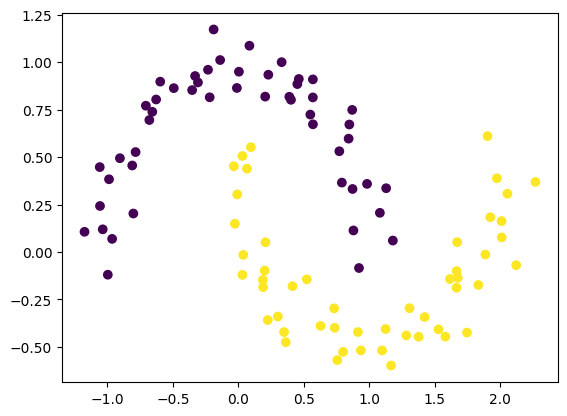

In [81]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

0.05902719497680664


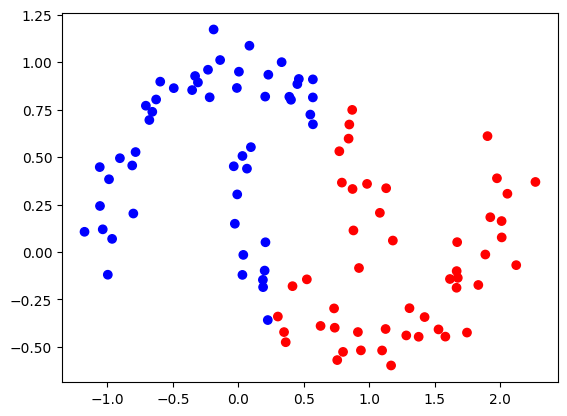

In [97]:
import time

start = time.time()
model_kmeans = KMeans(n_clusters=2)
labels = np.array(model_kmeans.fit_predict(X))
end_time = time.time()
plt.scatter(X[:,0], X[:,1], c=labels, cmap='bwr_r')
print(end_time - start)

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

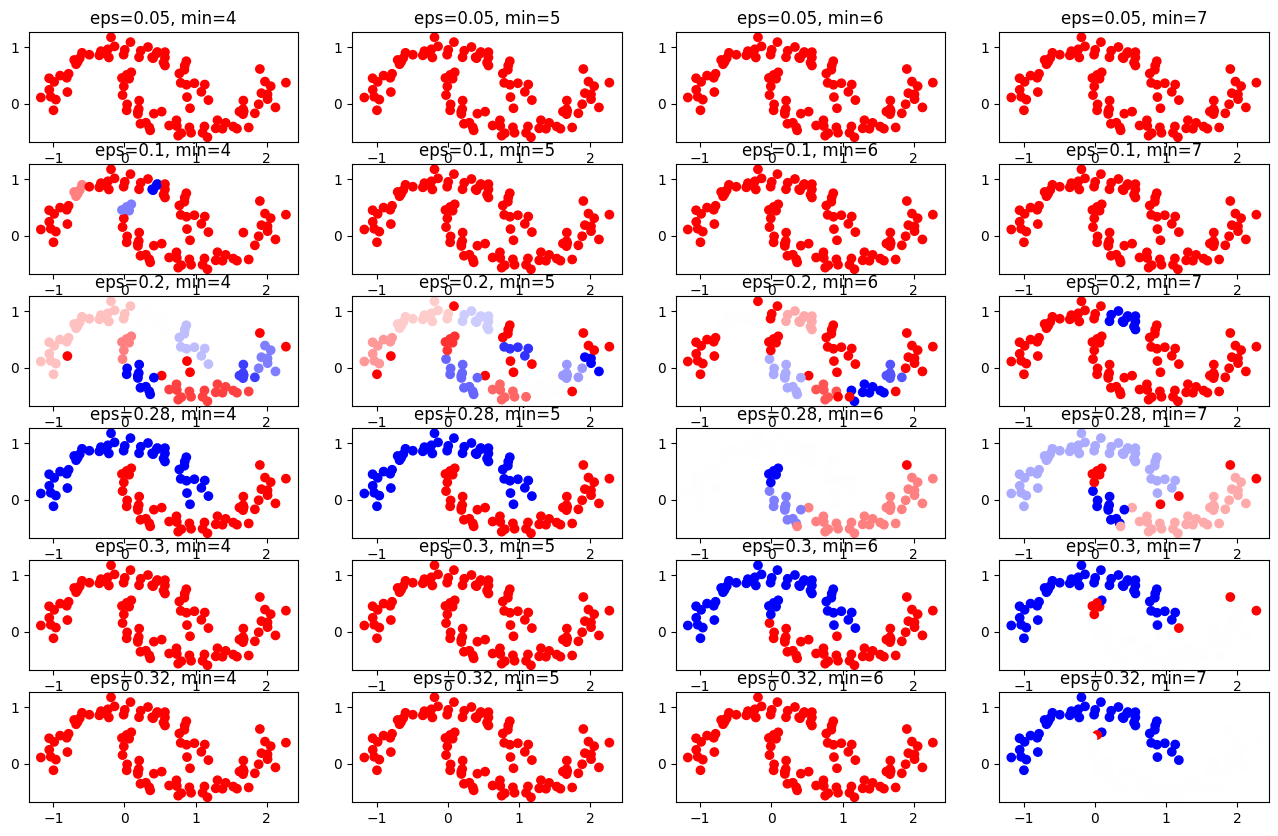

In [105]:
from sklearn.cluster import DBSCAN
i = 1
plt.figure(figsize=(16, 10))
for eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]:
    for min_samples in [4, 5, 6, 7]:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)
        plt.subplot(6, 4, i)
        plt.scatter(X[:,0], X[:,1], c=labels, cmap='bwr_r')
        plt.title(f'eps={eps}, min={min_samples}')
        i+=1


## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

In [107]:
from sklearn.cluster import AgglomerativeClustering

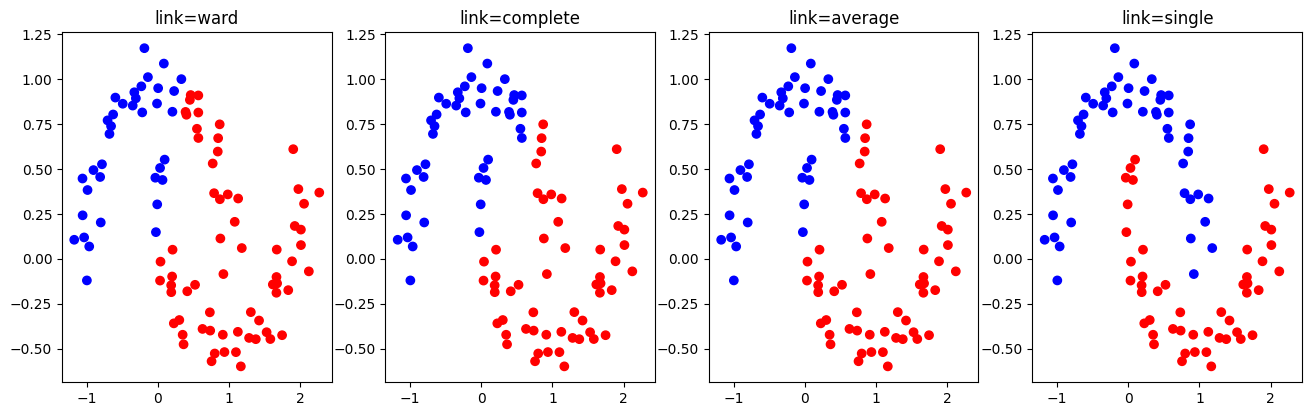

In [111]:

i = 1
plt.figure(figsize=(16, 10))
for linkage in ['ward', 'complete', 'average', 'single']:
    
    agglo_model = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    labels = agglo_model.fit_predict(X)
    plt.subplot(2, 4, i)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='bwr_r')
    plt.title(f'link={linkage}')
    i+=1

    

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

In [113]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [114]:
best_n_neighbors = None
best_score = -1
best_labels = None

# Перебор значений гиперпараметра n_neighbors
for n_neighbors in range(1, 20):
    clustering = SpectralClustering(
        n_clusters=2, 
        affinity='nearest_neighbors', 
        n_neighbors=n_neighbors, 
        random_state=42
    )
    
    # Fitting and predicting labels
    labels = clustering.fit_predict(X)
    
    # Оценка силуэта
    score = silhouette_score(X, labels)
    
    # Проверка на наилучший результат
    if score > best_score:
        best_score = score
        best_n_neighbors = n_neighbors
        best_labels = labels

    print(f'n_neighbors: {n_neighbors}, silhouette score: {score:.2f}')

print(f'Best n_neighbors: {best_n_neighbors}, Best silhouette score: {best_score:.2f}')

/home/fltww/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


n_neighbors: 1, silhouette score: 0.01
n_neighbors: 2, silhouette score: 0.05
n_neighbors: 3, silhouette score: -0.07


/home/fltww/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/home/fltww/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/home/fltww/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


n_neighbors: 4, silhouette score: 0.41
n_neighbors: 5, silhouette score: 0.32
n_neighbors: 6, silhouette score: 0.39
n_neighbors: 7, silhouette score: 0.46
n_neighbors: 8, silhouette score: 0.46
n_neighbors: 9, silhouette score: 0.45
n_neighbors: 10, silhouette score: 0.46
n_neighbors: 11, silhouette score: 0.46
n_neighbors: 12, silhouette score: 0.45
n_neighbors: 13, silhouette score: 0.46
n_neighbors: 14, silhouette score: 0.45
n_neighbors: 15, silhouette score: 0.45
n_neighbors: 16, silhouette score: 0.46
n_neighbors: 17, silhouette score: 0.46
n_neighbors: 18, silhouette score: 0.47
n_neighbors: 19, silhouette score: 0.47
Best n_neighbors: 18, Best silhouette score: 0.47


## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?